In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\CNP\CNP_AW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2
0,-0.45866,-1.235200
1,0.24348,-0.873130
2,0.25071,-0.808030
3,0.21462,-0.951980
4,0.12829,-1.031400
...,...,...
3995,0.89265,0.278030
3996,0.74741,0.428530
3997,1.07660,0.085708
3998,0.70388,0.351420


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	80


In [4]:
df.describe()

,column 1,column 2
count,4000.000000,3920.000000
mean,0.006711,0.006113
std,0.726242,0.729397
min,-1.714600,-1.353000
25%,-0.500103,-0.536890
50%,0.013352,0.011292
75%,0.553305,0.569198
max,1.363900,1.344400


<AxesSubplot:>

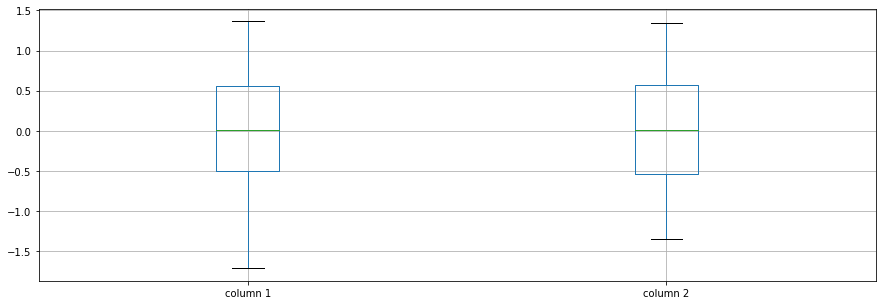

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.006711
column 2    0.006113
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2
column 1,1.000000,0.002806
column 2,0.002806,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [2,2+23,2+23+23,2+23+23+23,2+23+23+23+23,2+23+23+23+23+23,2+23+23+23+23,2+23+23+23,2+23+23,2+23,2], vae_layer = False, seed = 23)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [2]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 1.4293327412605286
Epoch: 1 , loss: 1.4299322295188903
Epoch: 2 , loss: 1.4281642904281617
Epoch: 3 , loss: 1.4294546661376952
Epoch: 4 , loss: 1.4282398672103882
Epoch: 5 , loss: 1.4290694546699525
Epoch: 6 , loss: 1.4282323908805847
Epoch: 7 , loss: 1.4297040996551513
Epoch: 8 , loss: 1.4300010962486267
Epoch: 9 , loss: 1.4296751704216004
Epoch: 10 , loss: 1.4301919584274292
Epoch: 11 , loss: 1.4292468013763429
Epoch: 12 , loss: 1.428840455532074
Epoch: 13 , loss: 1.4292360305786134
Epoch: 14 , loss: 1.4297488417625428
Epoch: 15 , loss: 1.427539375782013
Epoch: 16 , loss: 1.4287070288658141
Epoch: 17 , loss: 1.4293180799484253
Epoch: 18 , loss: 1.4290854291915893
Epoch: 19 , loss: 1.428875831604004
Epoch: 20 , loss: 1.4286444993019105
Epoch: 21 , loss: 1.430432225227356
Epoch: 22 , loss: 1.4287055206298829
Epoch: 23 , loss: 1.4289608726501464
Epoch: 24 , loss: 1.4299862837791444
Epoch: 25 , loss: 1.43

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4000, 2)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.025127
column 2   -1.258200
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\CNP.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3995,0.0,0.0
3996,0.0,0.0
3997,0.0,0.0
3998,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4.68599671247885, 64.9340549279942)

In [17]:
NRMS=numerator/denominator
NRMS


0.07216547184178138

In [18]:
new_df.iloc[66,:]

column 1    0.12305
column 2   -1.03610
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2
0,-0.45866,-1.235200
1,0.24348,-0.873130
2,0.25071,-0.808030
3,0.21462,-0.951980
4,0.12829,-1.031400
...,...,...
3995,0.89265,0.278030
3996,0.74741,0.428530
3997,1.07660,0.085708
3998,0.70388,0.351420


In [20]:
imputations[-1].to_excel("CNP_AW_1(imp).xlsx", index=False, header=False)